# Bus Operation Simulation

This notebook demonstrates random number generation and the 4-step SimPy structure with a very simple bus simulation.


In [29]:
# NumPy Random Variable Generation Demo
import numpy as np

# Generate 100 random values of travel time from normal distribution
# Mean = 3, Standard deviation = 0.3
np.random.seed(43)  # For reproducible results
random_values = np.random.normal(loc=3.0, scale=0.3, size=100)
# print the first 5 elements of random_values
print(random_values[:4])


[3.07721998 2.72745557 2.88644907 2.83952532]


In [31]:
# Print basic statistics
print("Random Variable Generation Demo")
print("=" * 40)
print(f"Generated {len(random_values)} values")
print(f"Mean: {np.mean(random_values):.3f}")
print(f"Standard deviation: {np.std(random_values):.3f}")
print(f"Q1: {np.percentile(random_values, 25):.3f}")
print(f"Q3: {np.percentile(random_values, 75):.3f}")
print(f"Min: {np.min(random_values):.3f}")
print(f"Max: {np.max(random_values):.3f}")
print(f"Expected mean: 3.000")
print(f"Expected std: 0.300")

Random Variable Generation Demo
Generated 100 values
Mean: 3.019
Standard deviation: 0.288
Q1: 2.815
Q3: 3.244
Min: 2.386
Max: 3.680
Expected mean: 3.000
Expected std: 0.300


Given the travel time is a continious variable, it's appropriate to use histogram and box and whisker plot to visualize its distribution.

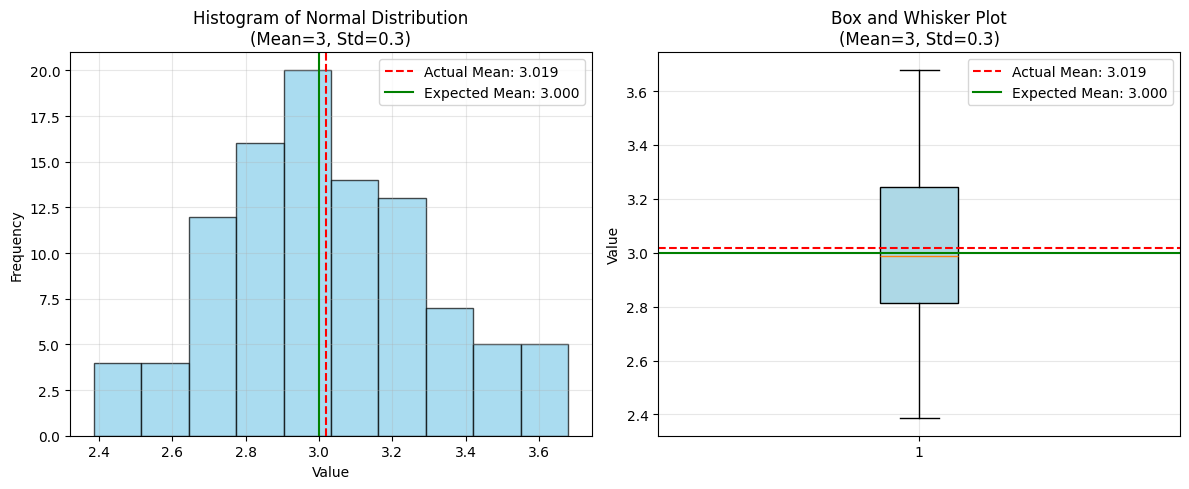

In [ ]:
import matplotlib.pyplot as plt

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(random_values, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(np.mean(random_values), color='red', linestyle='--', 
            label=f'Actual Mean: {np.mean(random_values):.3f}')
ax1.axvline(3.0, color='green', linestyle='-', 
            label='Expected Mean: 3.000')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Normal Distribution\n(Mean=3, Std=0.3)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box and Whisker Plot
box_plot = ax2.boxplot(random_values, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
ax2.axhline(np.mean(random_values), color='red', linestyle='--', 
            label=f'Actual Mean: {np.mean(random_values):.3f}')
ax2.axhline(3.0, color='green', linestyle='-', 
            label='Expected Mean: 3.000')
ax2.set_ylabel('Value')
ax2.set_title('Box and Whisker Plot\n(Mean=3, Std=0.3)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 4-Step Structure to Set Up a Simulation Using SimPy

In [13]:
import simpy

# Step 1: Create a SimPy Environment
env = simpy.Environment()
print(f"Step 1: Environment created. Current time: {env.now}")


Step 1: Environment created. Current time: 0


In [ ]:
# Step 2: Define a Generator Function
def bus_trip(env):
    """Simple bus trip from Stop A to Stop B"""
    # Record current simulation time (for departure)
    departure_time = env.now
    print(f"Bus departs at time {departure_time}")
    
    # Travel for 3 minutes (pause the process)
    yield env.timeout(3)
    
    # Record current simulation time again (for arrival)
    arrival_time = env.now
    print(f"Bus arrives at time {arrival_time}")

# Step 3: Add the Generator Function to a SimPy Environment
env.process(bus_trip(env))
print("Step 3: Bus process added to environment")


Step 2: Bus process added to environment


In [ ]:
# Step 4: Run the Simulation and Let Time Pass
print("Starting simulation...")
env.run()
print(f"Simulation completed. Final time: {env.now}")


Starting simulation...
Bus departs at time 3
Bus arrives at time 6
Simulation completed. Final time: 6


## Summary of the 4 Steps:

1. **Create SimPy Environment**: `env = simpy.Environment()`
2. **Define a Generator Function**: `def bus_trip(env): ...`
3. **Add the Generator Function to a SimPy Environment**: `env.process(bus_trip(env))`
4. **Run the Simulation and Let Time Pass**: `env.run()`

**Key Points:**
- The bus departs at time 0 and arrives at time 3
- `yield env.timeout(3)` pauses the process for 3 time units
- `env.run()` processes all events and advances time automatically
- To record the current time: `env.now`


In [ ]:
# 4-Step Structure with Random Travel Times (100 runs)
import random

# Global list to store results
results = []

# Step 2: Define a Generator Function
def bus_trip_random(env, run_number):
    """Bus trip with random travel time from normal distribution"""
    # Record departure time
    departure_time = env.now
    print(f"Run {run_number:3d}: Bus departs at time {departure_time:.1f}")
    
    # Generate random travel time: Normal(mean=3, std=0.3)
    travel_time = random.normalvariate(3.0, 0.3)
    travel_time = max(0.1, travel_time)  # Ensure positive
    
    # Travel (pause the process)
    yield env.timeout(travel_time)
    
    # Record arrival time
    arrival_time = env.now
    print(f"Run {run_number:3d}: Bus arrives at time {arrival_time:.1f} (travel: {travel_time:.2f} min)")
    
    # Store results
    results.append({
        'run': run_number,
        'departure_time': departure_time,
        'arrival_time': arrival_time,
        'travel_time': travel_time
    })

# Run 100 simulations
print("Running 100 simulations with random travel times...")
print("=" * 60)

for run in range(1, 101):
    # Step 1: Create SimPy Environment
    env = simpy.Environment()
    

    # Step 3: Add the Generator Function to a SimPy Environment
    env.process(bus_trip_random(env, run))
    
    # Step 4: Run the Simulation and Let Time Pass
    env.run()

print("\n" + "=" * 60)
print("All 100 simulations completed!")

# Calculate statistics
travel_times = [r['travel_time'] for r in results]
print(f"\nTravel Time Statistics:")
print(f"Mean: {sum(travel_times)/len(travel_times):.3f} minutes")
print(f"Min: {min(travel_times):.3f} minutes")
print(f"Max: {max(travel_times):.3f} minutes")
print(f"Expected: 3.000 minutes")


Running 100 simulations with random travel times...
Run   1: Bus departs at time 0.0
Run   1: Bus arrives at time 3.4 (travel: 3.42 min)
Run   2: Bus departs at time 0.0
Run   2: Bus arrives at time 2.7 (travel: 2.72 min)
Run   3: Bus departs at time 0.0
Run   3: Bus arrives at time 2.5 (travel: 2.48 min)
Run   4: Bus departs at time 0.0
Run   4: Bus arrives at time 2.8 (travel: 2.75 min)
Run   5: Bus departs at time 0.0
Run   5: Bus arrives at time 3.0 (travel: 3.04 min)
Run   6: Bus departs at time 0.0
Run   6: Bus arrives at time 3.3 (travel: 3.32 min)
Run   7: Bus departs at time 0.0
Run   7: Bus arrives at time 3.2 (travel: 3.24 min)
Run   8: Bus departs at time 0.0
Run   8: Bus arrives at time 2.5 (travel: 2.55 min)
Run   9: Bus departs at time 0.0
Run   9: Bus arrives at time 3.4 (travel: 3.39 min)
Run  10: Bus departs at time 0.0
Run  10: Bus arrives at time 3.6 (travel: 3.64 min)
Run  11: Bus departs at time 0.0
Run  11: Bus arrives at time 3.0 (travel: 3.04 min)
Run  12: Bus 